In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import sys
import mpu
from collections import Counter
from sklearn.cluster import DBSCAN
import matplotlib as m
%matplotlib inline  

In [4]:
coordinates = [(-2.075054, 51.901081),(-2.6064820740246017, 51.45647899474384),(-2.080165239507653, 51.89293323999039),(-2.080814838409424, 51.89648961344275),(-2.584896587279193, 51.45847603093426),(-2.074759, 51.901061),(-2.0566997590629508, 51.88934775970433),(-5.0629148628259415, 50.15129753542704),(-2.2458618879318237, 51.86543657900041),(-2.0872628688812256, 51.892321),(-0.15891551971435547, 51.49068939481727),(-2.5865202, 51.45825),(-2.082933816757899, 51.89541864604137),(-2.076287269592285, 51.903162676611494),(-2.6068426664569397, 51.45663501373899),(-4.936085, 50.539379),(-2.241697122143486, 51.8646946525558),(-2.081862, 51.895691),(-2.0758849382400513, 51.89996198081808),(-2.6022188308445022, 51.45415554635385),(-2.074825987501145, 51.90093094201475),(-2.077397, 51.89997),(-0.1205965659400948, 51.510149911535265),(-2.161788670532097, 51.87970659657007),(-2.075128, 51.900972),(-2.0775747299194336, 51.89781371273455),(-2.58636430970287, 51.45735038322449),(-2.2449986330311984, 51.86461818082256),(-2.079901, 51.89288319999999),(-1.8907803297042847, 52.9849770783408),(-2.078711986541748, 51.88990826105105),(-8.6153442859649658,54.98153687305258),(-8.6153442859649658, 54.973300291781555),(-8.96414378200332, -7.922100147343522),(-8.930546760559082, 52.44960184839787),(-1.6153442859649658,54.98153687305258),(-1.6153442859649658, 54.973300291781555),(112.96414378200332, -7.922100147343522),(-1.930546760559082, 52.44960184839787),(100.54102972072802, 13.751855091081296),(-1.2600960568304291, 51.755287777167574),(110.83810019689086, -6.81108880879573),(-0.08694648742675781, 51.50497615014911)]

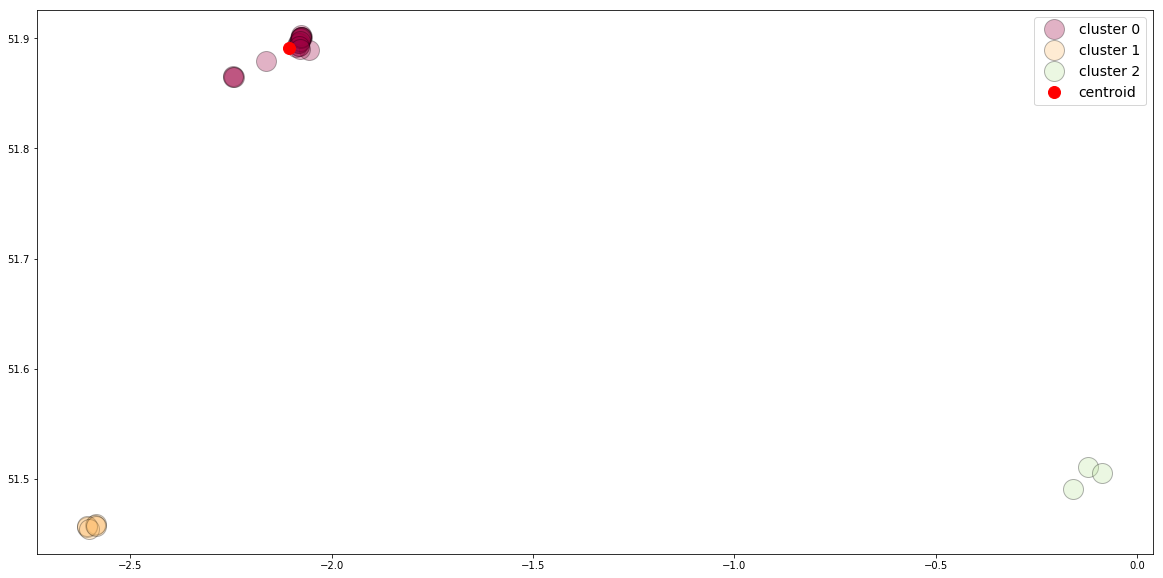

In [32]:
def get_centroids(c):

     return (sum(c[0])/len(c[0]),sum(c[1])/len(c[1]))


def doDBSCAN(X, ax, eps, mins):

    centers = [[1, 1], [-1, -1], [1, -1]]

    #X = StandardScaler().fit_transform(X)

    db = DBSCAN(eps, min_samples=mins).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    n_clusters_    = len(set(labels)) - (1 if -1 in labels else 0)
    n_labels       = Counter(labels)
    n_labelss      = Counter([lll for lll in labels if lll > -1])

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)  for each in np.linspace(0, 1, len(unique_labels))]
    centr  = []    
  
    if len(n_labelss) > 1:

        biggestcluster = n_labelss.most_common(1)[0][0]

        
        for k, col in zip(unique_labels, colors):

            class_member_mask = (labels == k)
            xy = X[class_member_mask & core_samples_mask]

            
            if len(xy) > 0:    
             
                if k == -1:
                    col = [0, 0, 0, 1]

                xy = X[class_member_mask & core_samples_mask]
                
                ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),  markeredgecolor='k', markersize=20, alpha = 0.3, label = 'cluster ' + str(k))
                ax.legend(loc = 'left', fontsize = 12)    
        
                if k == biggestcluster:
                    centr = get_centroids(list(zip(*[(cc[0], cc[1]) for cc in  list(X[class_member_mask])])))
                    
    
    return centr
        

    
    
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html    

eps  = 0.1
mins = 3


f, ax = plt.subplots(1, 1, figsize=(20, 10)) 
x     = np.asarray(coordinates)
centr = doDBSCAN(x, ax, eps, mins) 

ax.plot(centr[0], centr[1], 'ro', markersize = 12, label = 'centroid')
ax.legend(loc = 'left', fontsize = 14)
plt.show()